In [19]:
knitr::opts_chunk$set(echo = TRUE)
root_dir = '/scratch/users/neuroimage/conda/data'
knitr::opts_knit$set(root.dir = root_dir)
source("~/scripts/R-analysis/utils.R")

In [13]:
library(nnet)
library(ggplot2)
library(MASS)
library(knitr)
library(tidyverse)
library(glmnet)
library(caret)
library(psych)


load(file = file.path(root_dir, "R_data", "pca_cb.Rda"))
# load(file = file.path(root_dir, "R_data", "pca_gm.Rda"))
# load(file = file.path(root_dir, "R_data", "pca_cb.Rda"))

In [59]:
ls(pca_cb)

[1] "cum_var"     "prop_var"    "sdev"        "X_test_pca"  "X_train"    
[6] "X_train_pca" "y_test"      "y_train"

In [62]:
dim(pca_cb$X_test_pca)

[1]  87 157

In [63]:
N <- 87
train_indices <- rep(FALSE, N)

In [93]:
N <- 87
real_indices <- rep(FALSE, N)
y <- pca_cb$y_test
# https://www.alz.org/media/Documents/alzheimers-facts-and-figures-special-report-2022.pdf
# paper said 12-18% of people ages > 60 have MCI
# 10% of people ages > 60 have AD
n <- sum(y==0)

mci_n <- round(n * 0.13)
ad_n <- 1
cn_n <- (y==0)

# grab indices for group
set.seed(10)
real_indices[sample(which(y == 2), ad_n)] <- TRUE
real_indices[sample(which(y == 1), mci_n)] <- TRUE
real_indices[cn_n] <- TRUE

y[real_indices]
X[real_indices,]

In [94]:
# X_test <- X[!train_indices, ]
y[real_indices]
X[real_indices,]

[1] 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0

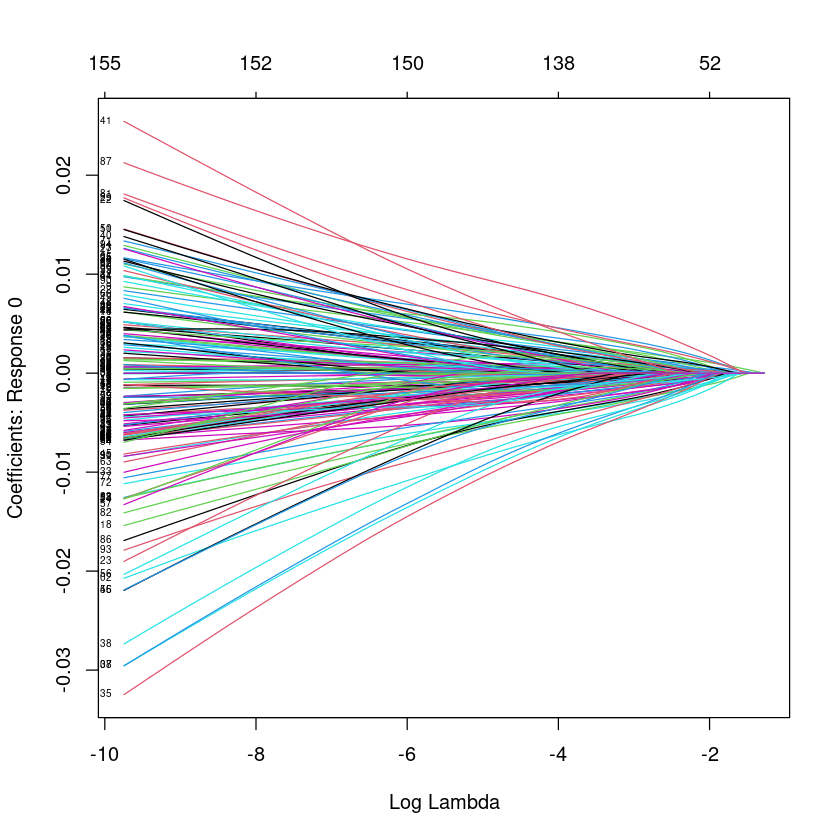

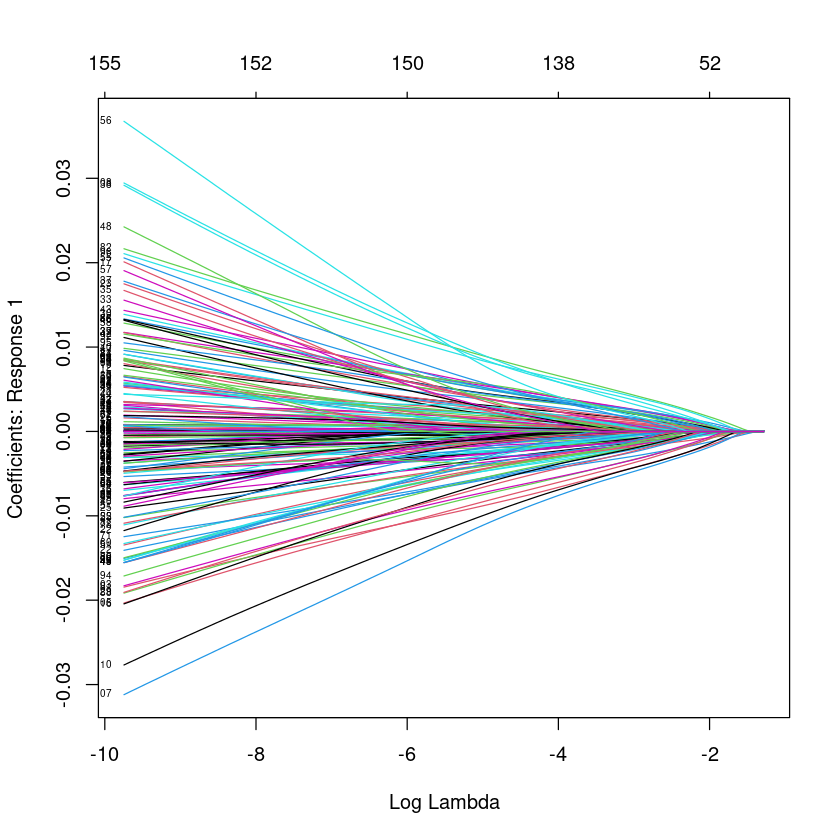

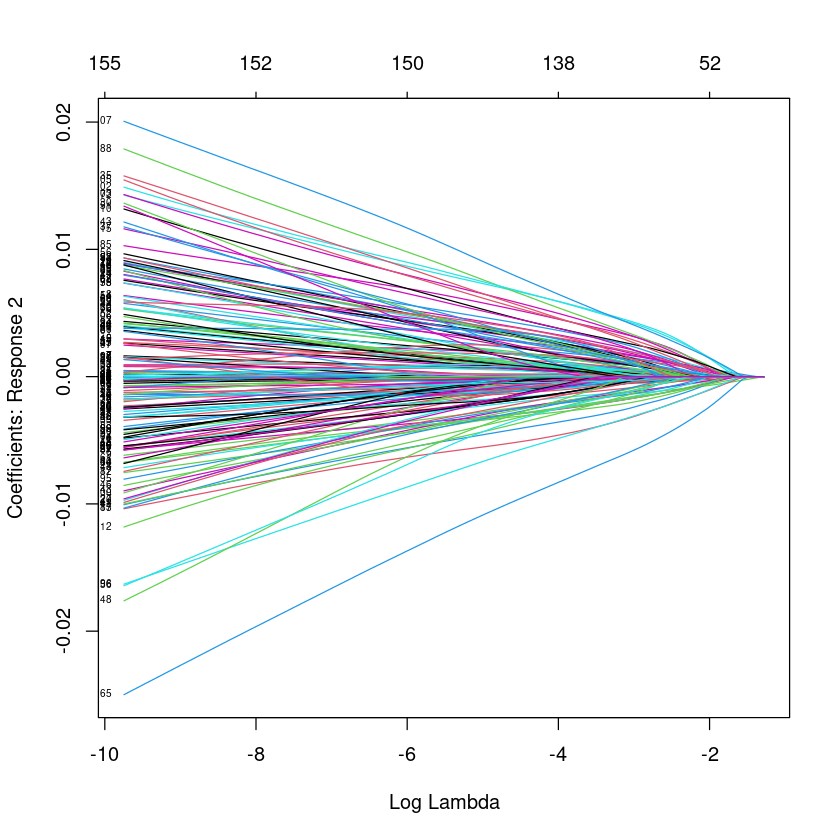

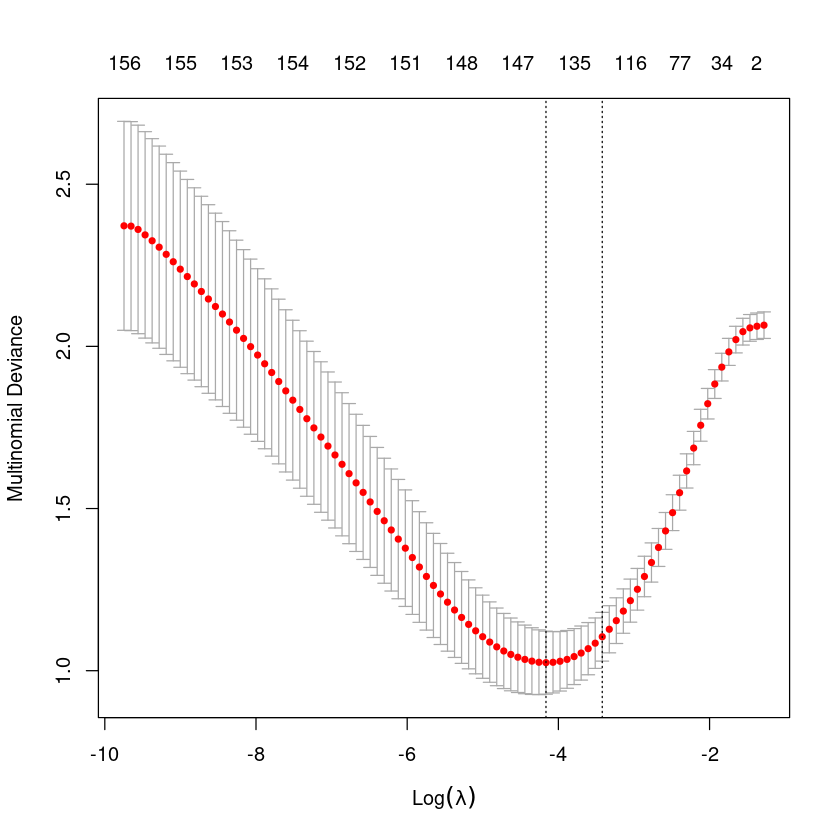

In [21]:
# balance weighted
cb_mn <- mn_reg(pca_cb, weight=FALSE)
# gm_mn <- mn_reg(pca_gm)
# cb_mn <- mn_reg(pca_cb)

# balance weighted
# wm_mn_nw <- mn_reg(pca_wm, weight=FALSE)
# gm_mn_nw <- mn_reg(pca_gm, weight=FALSE)
# cb_mn_nw <- mn_reg(pca_cb, weight=FALSE)

In [22]:
ls(cb_mn)

[1] "cm"     "kappa"  "mod"    "scores"

In [58]:
data.frame(model = c('multinomial', rep('',2), 'multinomial nw', rep('',2)),
           plane = rep(c('white matter', 'gray matter', 'combined'), 2),
           rbind(wm_mn$scores[[4]], 
                 gm_mn$scores[[4]],
                 cb_mn$scores[[4]],
                 wm_mn$scores[[4]], 
                 gm_mn$scores[[4]],
                 cb_mn$scores[[4]]
                ))

model,plane,acc,mce
<chr>,<chr>,<list>,<list>
multinomial,white matter,0.862069,0.137931
,gray matter,0.9310345,0.06896552
,combined,0.8850575,0.1149425
multinomial nw,white matter,0.862069,0.137931
,gray matter,0.9310345,0.06896552
,combined,0.8850575,0.1149425


In [56]:
df <- data.frame(rbind(get_other_scores_table(cb_mn$scores),
                 get_other_scores_table(wm_mn$scores),
                 get_other_scores_table(wm_mn$scores)))
rownames(df) <- NULL
df <- df %>%
mutate(model = c('multinomial', rep('',2), 'multinomialnw', rep('',2), 'lda', rep('',2)),
      score = rep(c('precision', 'recall', 'f1'), 3)) %>% 
select(model, score, everything())

# df$model = c('multinomial', rep('',2), 'multinomialnw', rep('',2), 'lda', rep('',2))

# df

model,score,CN,MCI,AD
<chr>,<chr>,<dbl>,<dbl>,<dbl>
multinomial,precision,0.8750000,0.8636364,1.0000000
,recall,0.9333333,0.9268293,0.6875000
,f1,0.9032258,0.8941176,0.8148148
multinomialnw,precision,0.8437500,0.8604651,0.9166667
,recall,0.9000000,0.9024390,0.6875000
,f1,0.8709677,0.8809524,0.7857143
lda,precision,0.8437500,0.8604651,0.9166667
,recall,0.9000000,0.9024390,0.6875000
,f1,0.8709677,0.8809524,0.7857143


In [50]:
get_other_scores_table(cb_mn$scores)

,CN,MCI,AD
precision,0.8750000,0.8636364,1.0000000
recall,0.9333333,0.9268293,0.6875000
f1,0.9032258,0.8941176,0.8148148


In [27]:
data.frame(model = c(rep('multinomial',2), rep('multinomial',2)),
           plane = rep(c('wm', 'gm'))
           rbind(wm_mn$scores[[4]], 
                 gm_mn$scores[[4]],
                gm_mn$scores[[4]], 
                 cb_mn$scores[[4]]))

model,plane,acc,mce
<chr>,<chr>,<list>,<list>
multinomial,wm,0.862069,0.137931
multinomial,gm,0.9310345,0.06896552
multinomial,wm,0.9310345,0.06896552
multinomial,gm,0.8850575,0.1149425


In [30]:
data.frame(model = c('multinomial', rep('', 2)),
           rbind(wm_mn$scores[[5]],
                 wm_mn$scores[[5]],
                 wm_mn$scores[[5]]
                ))

model,var,lb,ub,est
<chr>,<list>,<list>,<list>,<list>
multinomial,0.00356932,0.6585812,0.8927725,0.7756768
,0.00356932,0.6585812,0.8927725,0.7756768
,0.00356932,0.6585812,0.8927725,0.7756768
